In [3]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

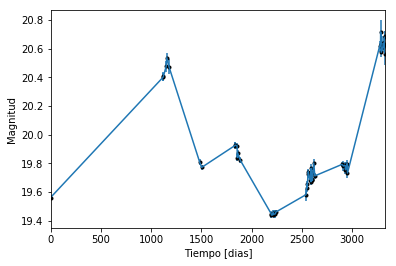

In [5]:
data = np.genfromtxt('LC_18344_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [6]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [7]:
%%capture capt
sample = model.run_mcmc(20000)

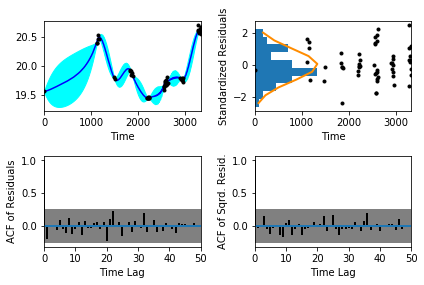

In [8]:
sample.assess_fit()

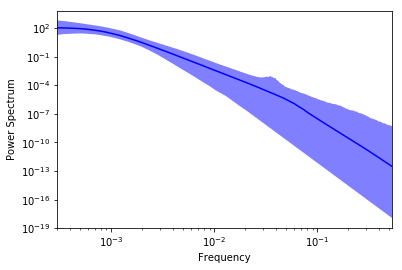

In [9]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [10]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000375271,0.0816834,'Medida del nivel de ruido')

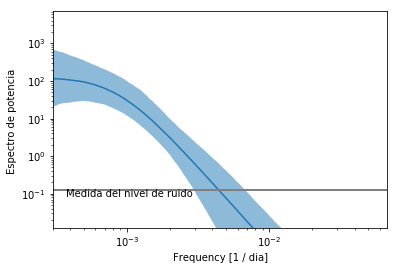

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

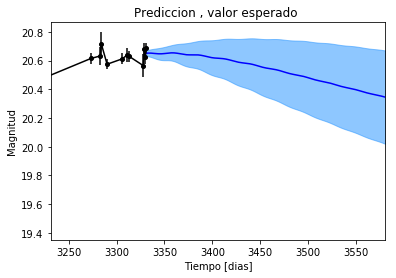

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

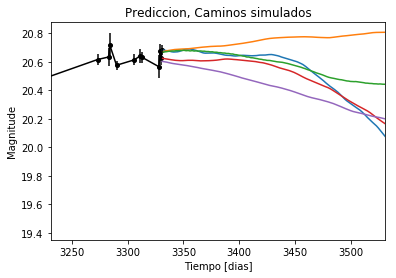

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


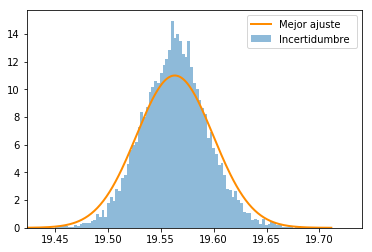

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

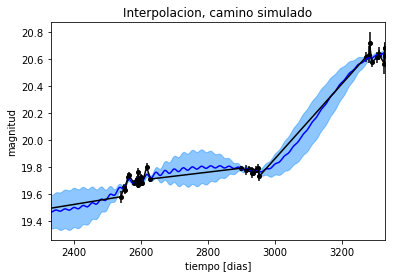

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

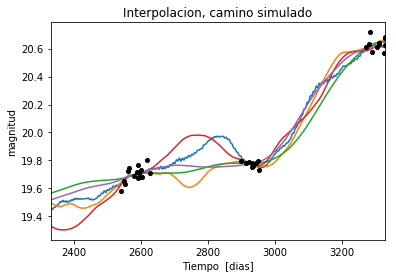

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


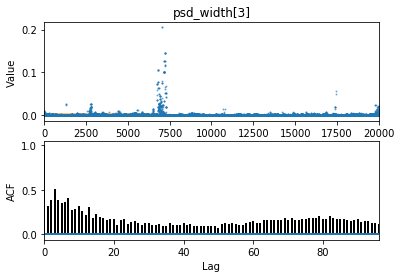

In [18]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [19]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [20]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 693.461331206
Median: 0.00230417734927
Standard deviation: 0.167832036103
68% credibility interval: [ 0.00041449  0.09713352]
95% credibility interval: [  3.15047927e-04   6.82946742e-01]
99% credibility interval: [  3.03258774e-04   9.54545849e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 393.64352273
Median: 0.000690361733565
Standard deviation: 0.0675110374626
68% credibility interval: [ 0.00036615  0.0062746 ]
95% credibility interval: [ 0.00030877  0.19425067]
99% credibility interval: [  3.02047729e-04   5.08078329e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 398.230919653
Median: 0.00725516507606
Standar

In [21]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 279.665446816
Median: 0.000539244972593
Standard deviation: 0.182576778597
68% credibility interval: [ 0.          0.10880753]
95% credibility interval: [ 0.          0.72158877]
99% credibility interval: [ 0.        0.966236]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 279.665446816
Median: 0.000539244972593
Standard deviation: 0.182576778597
68% credibility interval: [ 0.          0.10880753]
95% credibility interval: [ 0.          0.72158877]
99% credibility interval: [ 0.        0.966236]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 642.202382377
Median: 0.0
Standard deviation: 0.000276239625738
68% credib

Plotting parameter summary


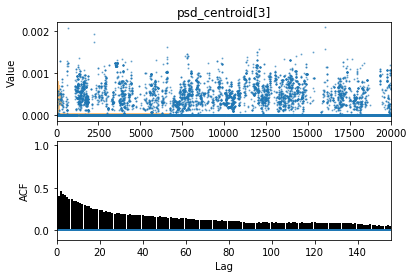

In [23]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [24]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [25]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 555.051728202
Median: 109.16860392
Standard deviation: 1.64157030372
68% credibility interval: [ 107.39341468  110.36413502]
95% credibility interval: [ 104.83040984  111.28947441]
99% credibility interval: [ 103.04994549  111.77893325]


In [26]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [27]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 453.491136549
Median: 0.379168437895
Standard deviation: 1.79066934205
68% credibility interval: [ 0.03064942  2.95791149]
95% credibility interval: [ 0.01181862  6.23402687]
99% credibility interval: [ 0.0089145   8.79882999]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 429.102547357
Median: 0.0430599293613
Standard deviation: 6.2896008838
68% credibility interval: [  1.22049090e-03   1.80418913e+00]
95% credibility interval: [  1.4

Plotting parameter summary


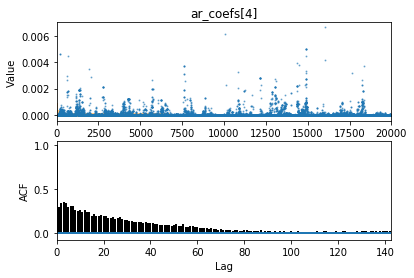

In [28]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [29]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [30]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20004.6721464
Median: 1.56920545244e-16
Standard deviation: 7.52401844797e+146
68% credibility interval: [  7.08768414e-54   1.51997504e+49]
95% credibility interval: [  4.08552921e-099   6.10038327e+134]
99% credibility interval: [  1.21039845e-105   2.04306641e+145]


In [31]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2798.30784047
Median: 19.90780242
Standard deviation: 0.241325364506
68% credibility interval: [ 19.73586574  20.09666331]
95% credibility interval: [ 19.43230877  20.42961177]
99% credibility interval: [ 19.07180814  20.74705588]


Plotting parameter summary


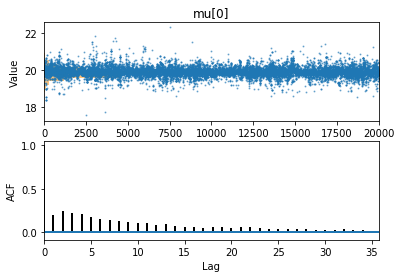

In [33]:
sample.plot_parameter('mu', 0, doShow=True)

In [34]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

Plotting parameter summary


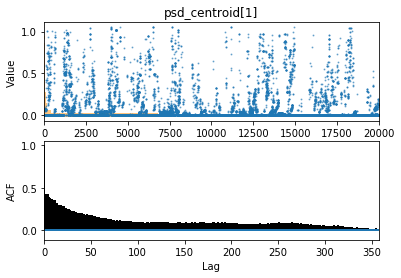

In [35]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [36]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [37]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 555.051728202
Median: 109.16860392
Standard deviation: 1.64157030372
68% credibility interval: [ 107.39341468  110.36413502]
95% credibility interval: [ 104.83040984  111.28947441]
99% credibility interval: [ 103.04994549  111.77893325]


Plotting parameter summary


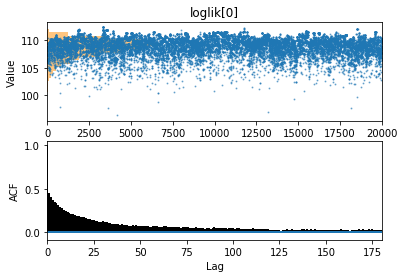

In [38]:
sample.plot_parameter('loglik', 0, doShow=True)

In [39]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [40]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 827.847961504
Median: 0.206401389576
Standard deviation: 0.269515334819
68% credibility interval: [ 0.11962892  0.41829483]
95% credibility interval: [ 0.07388894  1.01497848]
99% credibility interval: [ 0.05725167  1.66067565]


Plotting parameter summary


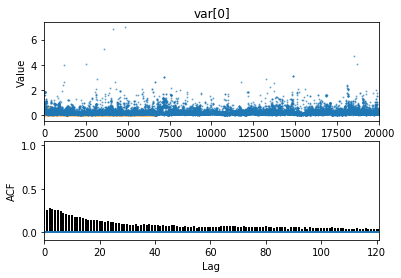

In [41]:
sample.plot_parameter('var', 0, doShow=True)

In [42]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [43]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1849.40880867
Median: 1.15330669987
Standard deviation: 0.180348097931
68% credibility interval: [ 0.99598897  1.34628264]
95% credibility interval: [ 0.87155907  1.58209199]
99% credibility interval: [ 0.79028878  1.75366517]


Plotting parameter summary


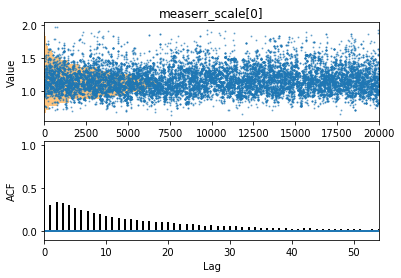

In [44]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [45]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [46]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 624.840759366
Median: 9.76313891168e-06
Standard deviation: 0.00242981013421
68% credibility interval: [  2.58115710e-54   6.06607378e-04]
95% credibility interval: [  1.97803581e-139   7.39904393e-003]
99% credibility interval: [  1.17644521e-149   1.59570920e-002]


Plotting parameter summary


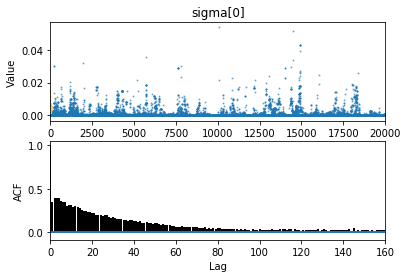

In [47]:
sample.plot_parameter('sigma', 0, doShow=True)

In [48]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [49]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 693.461331206
Median: (-0.0144775732661-0.217312185077j)
Standard deviation: 1.55820300444
68% credibility interval: [-0.61030787+0.j         -0.00260430-0.00309717j]
95% credibility interval: [ -4.29108093e+00+0.j          -1.97950451e-03-0.00249545j]
99% credibility interval: [ -5.99758845e+00+0.j          -1.90543108e-03-0.00315888j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 393.64352273
Median: (-0.00433767070098+0.00203335642694j)
Standard deviation: 1.22307685767
68% credibility interval: [-0.03942446+0.11685516j -0.00230057+0.0045816j ]
95% credibility interval: [-1.22051296+5.34757517j -0.00194007+0.40038493j]
99% credibility interval: [ -3.19235029e+00+5.77326023j  -1.89782185e-03+0.j        ]
Posterior 